# Import libraries

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from ast import literal_eval

In [8]:
def convert_to_list(columns:str, separator=", "):
    return columns.split(separator)

In [80]:
# importando datasets
df_anime=pd.read_csv("/Users/chenyenpin/Documents/RECOMMENDER+STREAMLIT/dataframes/animes.csv")
df_profile=pd.read_csv('/Users/chenyenpin/Documents/RECOMMENDER+STREAMLIT/dataframes/profiles.csv')
df_review=pd.read_csv("/Users/chenyenpin/Documents/RECOMMENDER+STREAMLIT/dataframes/reviews.csv")

In [9]:
df_anime.head(1)

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...


In [15]:
df_profile.head(1)

,profile,gender,birthday,favorites_anime,link
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche


In [16]:
df_review.head(1)

,uid,profile,anime_uid,text,score,scores,link
0,255938,DesolatePsyche,34096,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938


In [81]:
df=df_profile.merge(df_review, how='left', on="profile" )
df_all=df_anime.merge(df, on="uid", how="left")

In [141]:
columns=[
    'uid', 
    'title', 
    'anime_uid',
    #'synopsis', 
    'genre', 
    'aired', 
    #'episodes', 
    #'members',  
    'popularity',  
    #'ranked', 
    #'score_x', 
    #'img_url', 
    #'link', 
    #'profile',
    #'gender', 
    #'birthday', 
    #'favorites_anime', 
    #'link_x', 
        
    #'text',
    'score_y', 
    #'scores', 
    #'link_y'
       ]

In [142]:
df_rec=df_all[columns]

In [143]:
df_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42181 entries, 0 to 42180
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         42181 non-null  int64  
 1   title       42181 non-null  object 
 2   anime_uid   31738 non-null  float64
 3   genre       42181 non-null  object 
 4   aired       42181 non-null  object 
 5   popularity  42181 non-null  int64  
 6   score_y     31738 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 2.3+ MB


In [144]:
df_rec["id_anime"]=LabelEncoder().fit_transform(df_rec["anime_uid"])

/Users/chenyenpin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/chenyenpin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/var/folders/s2/z2r_n2517y18_q1zxtj3m5lw0000gn/T/ipykernel_46984/1980026574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rec["id_anime"]=LabelEncoder().fit_transform(df_rec["anime_uid"])


In [145]:
df_rec.id_anime

0        1945
1        1679
2        1679
3        1679
4        1679
         ... 
42176     208
42177     208
42178     208
42179     208
42180     208
Name: id_anime, Length: 42181, dtype: int64

In [147]:
df_rec=df_rec.drop_duplicates(keep="first")
df_rec=df_rec.drop(columns="anime_uid")

In [148]:
df_rec.shape

(16269, 7)

In [149]:
df_rec.isna().sum()

uid              0
title            0
genre            0
aired            0
popularity       0
score_y       8772
id_anime         0
dtype: int64

In [ ]:
# transformando o genre em lista
df_rec['genre'] = df_rec['genre'].apply(literal_eval)

<AxesSubplot:ylabel='score_y'>

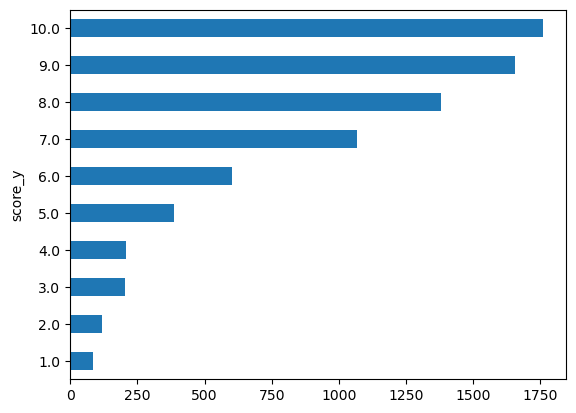

In [183]:
rating=df_rec.groupby("score_y").count()["uid"]

rating.plot(kind="barh")

In [180]:
rating

score_y
1.0       83
2.0      118
3.0      204
4.0      209
5.0      386
6.0      604
7.0     1068
8.0     1380
9.0     1657
10.0    1759
Name: uid, dtype: int64

# Esparcidade

In [156]:
n_user=df_rec["uid"].nunique()
n_itens=df_rec["id_anime"].nunique()
n_rating=df_all[["uid","anime_uid"]].drop_duplicates().shape[0]

In [157]:
print(f"USER: {n_user}")
print(f"Itens: {n_itens}")
print(f"rating: {n_rating}")

USER: 16216
Itens: 1946
rating: 16216


In [158]:
overral_sparcity= 1-n_rating/(n_user*n_itens)

print("overall sparcity:{:.02f}%".format(100*overral_sparcity))

overall sparcity:99.95%


In [165]:
df_rec.duplicated().any()

False

In [173]:
df_rec=df_rec.drop_duplicates(subset='uid', keep="first")

In [185]:
df_rec1=df_rec

In [190]:

df_rec['genre'] = df_rec['genre'].apply(literal_eval)

In [205]:
genres=(df_rec
        .explode("genre")
        .groupby("genre")
        .count()["id_anime"]
        .head(20)
        .sort_values(ascending=False)
        )

genres

genre
Comedy          5640
Action          3572
Fantasy         2971
Adventure       2753
Kids            2458
Drama           2457
Hentai          1295
Mecha           1060
Historical      1051
Magic           1013
Ecchi            740
Military         541
Demons           453
Horror           434
Dementia         402
Harem            374
Martial Arts     367
Game             348
Cars             117
Josei             93
Name: id_anime, dtype: int64

<AxesSubplot:ylabel='genre'>

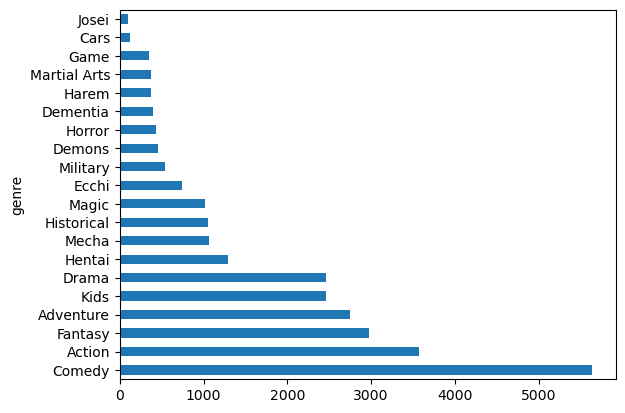

In [206]:
#distribuicao por genero

genres.plot(kind="barh")

In [208]:
# saber quantos pessas deram tais ratings

rating=(df_rec.groupby("score_y")
        .count()["uid"]
        )

rating

score_y
1.0       83
2.0      118
3.0      204
4.0      209
5.0      386
6.0      604
7.0     1068
8.0     1380
9.0     1657
10.0    1759
Name: uid, dtype: int64

In [172]:
df_rec[df_rec.duplicated(subset='uid', keep=False)]

,uid,title,genre,aired,popularity,score_y,id_anime
1967,40269,Kengan Ashura 2nd Season,"['Action', 'Martial Arts']","Oct 31, 2019",3986,NaN,1945
2115,40269,Kengan Ashura 2nd Season,"['Action', 'Martial Arts']","Oct 31, 2019",3982,NaN,1945
2323,324,Kidou Keisatsu Patlabor: On Television,"['Comedy', 'Mecha', 'Police', 'Sci-Fi']","Oct 11, 1989 to Sep 26, 1990",2851,8.0,103
2325,255,Jungle wa Itsumo Hare nochi Guu Final,"['Slice of Life', 'Comedy']","Dec 21, 2003 to Jun 25, 2004",4583,NaN,1945
2327,3931,Initial D Battle Stage 2,"['Action', 'Cars', 'Sports', 'Drama', 'Seinen']","May 30, 2007",3362,NaN,1945
...,...,...,...,...,...,...,...
32108,36005,Mainichi JK Kikaku Episode 0,['School'],Not available,8689,9.0,250
32115,40497,Mahouka Koukou no Rettousei: Raihousha-hen,"['Action', 'Magic', 'Romance', 'School', 'Sci-...",2020 to ?,2859,10.0,1741
32124,37984,"Kumo Desu ga, Nani ka?","['Adventure', 'Comedy', 'Fantasy']",Not available,4176,6.0,1782
32126,35960,Kud Wafter,"['Comedy', 'Romance', 'School']","Sep, 2020",4644,1.0,903


In [174]:
df_rec.pivot(
    index="uid",
    columns="id_anime",
    values="score_y"
)

id_anime,0,1,2,3,4,5,6,7,8,9,...,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945
uid,,,,,,,,,,,,,,,,,,,,,
1,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
df_preference=df_rec.pivot(
        index="uid",
        columns="id_anime",
        values="score_y"
)
df_preference.fillna(0)

id_anime,0,1,2,3,4,5,6,7,8,9,...,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945
uid,,,,,,,,,,,,,,,,,,,,,
1,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
df_rec[df_rec.title=="Haikyuu!! Second Season"]

,uid,title,genre,aired,popularity,score_x,score_y,id_anime
0,28891,Haikyuu!! Second Season,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",141,8.82,NaN,1945


In [70]:
df_all[["aire1","aired2"]]=df_all["aired"].str.split("to", expand=True)

In [74]:
df_all.scores.unique().tolist()

[nan,
 "{'Overall': '10', 'Story': '9', 'Animation': '9', 'Sound': '10', 'Character': '9', 'Enjoyment': '10'}",
 "{'Overall': '10', 'Story': '10', 'Animation': '10', 'Sound': '10', 'Character': '10', 'Enjoyment': '10'}",
 "{'Overall': '6', 'Story': '7', 'Animation': '8', 'Sound': '8', 'Character': '5', 'Enjoyment': '6'}",
 "{'Overall': '8', 'Story': '8', 'Animation': '9', 'Sound': '9', 'Character': '8', 'Enjoyment': '8'}",
 "{'Overall': '9', 'Story': '5', 'Animation': '7', 'Sound': '7', 'Character': '9', 'Enjoyment': '10'}",
 "{'Overall': '9', 'Story': '10', 'Animation': '9', 'Sound': '8', 'Character': '9', 'Enjoyment': '7'}",
 "{'Overall': '9', 'Story': '10', 'Animation': '10', 'Sound': '10', 'Character': '10', 'Enjoyment': '8'}",
 "{'Overall': '7', 'Story': '8', 'Animation': '8', 'Sound': '7', 'Character': '7', 'Enjoyment': '7'}",
 "{'Overall': '9', 'Story': '9', 'Animation': '8', 'Sound': '8', 'Character': '9', 'Enjoyment': '9'}",
 "{'Overall': '10', 'Story': '7', 'Animation': '6', 

In [71]:
df_all

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score_x,...,link_x,anime_uid,text,score_y,scores,link_y,aired_list,aired1,aired2,aire1
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"[['Comedy', 'Sports', 'Drama', 'School', 'Shou...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,...,NaN,NaN,NaN,NaN,NaN,NaN,"[Oct 4, 2015 , Mar 27, 2016]",0,"Mar 27, 2016","Oct 4, 2015"
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"[['Drama', 'Music', 'Romance', 'School', 'Shou...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,...,https://myanimelist.net/profile/itaeon,6811.0,\n \n \n \n ...,10.0,"{'Overall': '10', 'Story': '9', 'Animation': '...",https://myanimelist.net/reviews.php?id=23273,"[Oct 10, 2014 , Mar 20, 2015]",0,"Mar 20, 2015","Oct 10, 2014"
2,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"[['Drama', 'Music', 'Romance', 'School', 'Shou...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,...,https://myanimelist.net/profile/itaeon,6811.0,\n \n \n \n ...,10.0,"{'Overall': '10', 'Story': '9', 'Animation': '...",https://myanimelist.net/reviews.php?id=23273,"[Oct 10, 2014 , Mar 20, 2015]",0,"Mar 20, 2015","Oct 10, 2014"
3,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"[['Drama', 'Music', 'Romance', 'School', 'Shou...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,...,https://myanimelist.net/profile/itaeon,6811.0,\n \n \n \n ...,10.0,"{'Overall': '10', 'Story': '9', 'Animation': '...",https://myanimelist.net/reviews.php?id=23273,"[Oct 10, 2014 , Mar 20, 2015]",0,"Mar 20, 2015","Oct 10, 2014"
4,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"[['Drama', 'Music', 'Romance', 'School', 'Shou...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,...,https://myanimelist.net/profile/itaeon,6811.0,\n \n \n \n ...,10.0,"{'Overall': '10', 'Story': '9', 'Animation': '...",https://myanimelist.net/reviews.php?id=23273,"[Oct 10, 2014 , Mar 20, 2015]",0,"Mar 20, 2015","Oct 10, 2014"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42176,87,Mobile Suit Gundam: Char's Counterattack,The year is Universal Century 0093. Char Aznab...,"[['Military', 'Sci-Fi', 'Space', 'Drama', 'Mec...","Mar 12, 1988",1.0,29248,2604,1081.0,7.73,...,https://myanimelist.net/profile/ivorykeys,267.0,\n \n \n \n ...,10.0,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=87,"[Mar 12, 1988]",0,None,"Mar 12, 1988"
42177,87,Mobile Suit Gundam: Char's Counterattack,The year is Universal Century 0093. Char Aznab...,"[['Military', 'Sci-Fi', 'Space', 'Drama', 'Mec...","Mar 12, 1988",1.0,29248,2604,1081.0,7.73,...,https://myanimelist.net/profile/ivorykeys,267.0,\n \n \n \n ...,10.0,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=87,"[Mar 12, 1988]",0,None,"Mar 12, 1988"
42178,87,Mobile Suit Gundam: Char's Counterattack,The year is Universal Century 0093. Char Aznab...,"[['Military', 'Sci-Fi', 'Space', 'Drama', 'Mec...","Mar 12, 1988",1.0,29248,2604,1081.0,7.73,...,https://myanimelist.net/profile/ivorykeys,267.0,\n \n \n \n ...,10.0,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=87,"[Mar 12, 1988]",0,None,"Mar 12, 1988"
42179,87,Mobile Suit Gundam: Char's Counterattack,The year is Universal Century 0093. Char Aznab...,"[['Military', 'Sci-Fi', 'Space', 'Drama', 'Mec...","Mar 12, 1988",1.0,29248,2604,1081.0,7.73,...,https://myanimelist.net/profile/ivorykeys,267.0,\n \n \n \n ...,10.0,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=87,"[Mar 12, 1988]",0,None,"Mar 12, 1988"


In [70]:
#dropando os duplicados
df_all=df_all.drop_duplicates(keep="first")

In [71]:
df_all.duplicated().sum()

0

In [ ]:
def convert_to_list(columns:str, separator=","):
    return columns.split(separator)